# Part 2: Xây dựng model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from modules.file import CPandasFile
from modules.drawer import CDrawer

from typing import List

In [3]:
pandas_file = CPandasFile()
drawer = CDrawer()

1.Đọc dữ liệu `news.csv` lên

In [4]:
news = pandas_file.readCsv(r'./data/news.csv', index_col=0)
news

content     class
0     collin call chamber return world champion kim ...     sport
1     ronaldo consid new contract manchest unit wing...     sport
2     tv call carrol error spur boss martin jol said...     sport
3     england defens crisi grow england defens worri...     sport
4     darci injuri add ireland woe gordon darci ha r...     sport
...                                                 ...       ...
2220  disney settl disclosur charg walt disney ha se...  business
2221  fed chief warn us deficit feder reserv chairma...  business
2222  indonesia declin debt freez indonesia longer n...  business
2223  market signal brazilian recoveri brazilian sto...  business
2224  economi strong elect year uk busi set prosper ...  business

[2225 rows x 2 columns]

2. Xây dựng tập training data `X`

In [5]:
X = news['content'].values

X[:3]

array(['collin call chamber return world champion kim collin say suspend sprinter dwain chamber allow compet olymp chamber wa ban two year test posit anabol steroid thg hi suspens run novemb thi year collin say british olymp associ revers decis ban olymp life wa harsh collin told radio five live reconsid chamber ha america learn american footbal ha rule return track collin ad great guy never ani problem friend would like see dwain come back compet good person even though made mistak understand given chanc onc',
       'ronaldo consid new contract manchest unit winger cristiano ronaldo said close agre new contract old trafford portug star join august fiveyeard regular unit firstteam unit board alreadi made offer renew contract im tri think told news world agent ha spoken club resolv soon think well reach good agreement side ronaldo refus commit hi longterm futur club nobodi know come tomorrow like know ad arent mani bigger better club thi one ambit big club im happi nobodi know futur',


3. Build Model

3.1. Thử áp dụng K-Means

In [6]:
from modules.kmeans_text import CKMeansText

3.1.1. Build model

In [7]:
kmeans_text_model = CKMeansText(X)

3.1.2. Tìm giá trị k phù hợp

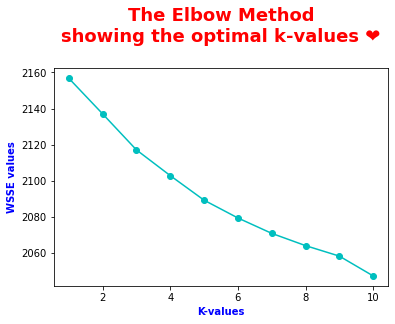

In [8]:
kmeans_text_model.recommendKValue()

> **Nhận xét**
> * Nhìn chung giá trị WSSE giảm mạnh trong khoảng từ \[2, 4\]. Bắt đầu từ từ 5 trở đi, giá trị WSSE giảm ko còn mạnh nữa.

> $\Rightarrow$ Xem xét k = 5, 6.

3.1.3. Build model với k-value = 5

In [9]:
k5_kmeans_model = CKMeansText(X)
k5_kmeans_model.initModel(5)

In [10]:
cluster_coors = k5_kmeans_model.showClusterCenter()

cluster_coors

array([[0.00000000e+00, 2.83745121e-03, 1.93503038e-04, ...,
        3.01724251e-03, 1.41116045e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.64556780e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.53927828e-03, 0.00000000e+00, 0.00000000e+00],
       [7.75364246e-05, 5.10508888e-05, 0.00000000e+00, ...,
        1.21280760e-02, 1.51984631e-04, 1.09438368e-04],
       [0.00000000e+00, 2.22251217e-04, 1.86299169e-04, ...,
        1.64076942e-03, 0.00000000e+00, 0.00000000e+00]])

In [11]:
cluster_coors.shape

(5, 21363)

In [12]:
labels = k5_kmeans_model.showSampleLabels()
news['label'] = labels

news

content     class  label
0     collin call chamber return world champion kim ...     sport      0
1     ronaldo consid new contract manchest unit wing...     sport      0
2     tv call carrol error spur boss martin jol said...     sport      0
3     england defens crisi grow england defens worri...     sport      0
4     darci injuri add ireland woe gordon darci ha r...     sport      0
...                                                 ...       ...    ...
2220  disney settl disclosur charg walt disney ha se...  business      3
2221  fed chief warn us deficit feder reserv chairma...  business      3
2222  indonesia declin debt freez indonesia longer n...  business      3
2223  market signal brazilian recoveri brazilian sto...  business      3
2224  economi strong elect year uk busi set prosper ...  business      3

[2225 rows x 3 columns]

3.1.4. Trực quan hóa dữ liệu

In [13]:
import numpy as np

label_group_content: np.array(str) = news.groupby('label')['content'].apply(np.array)

Group: 0


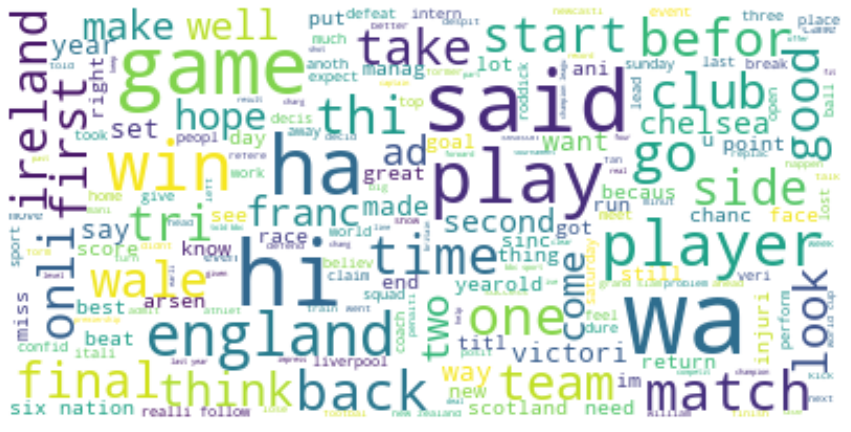

Group: 1


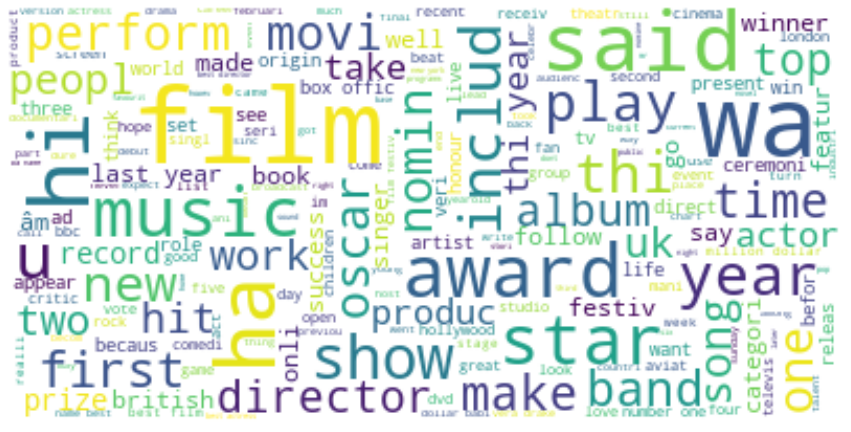

Group: 2


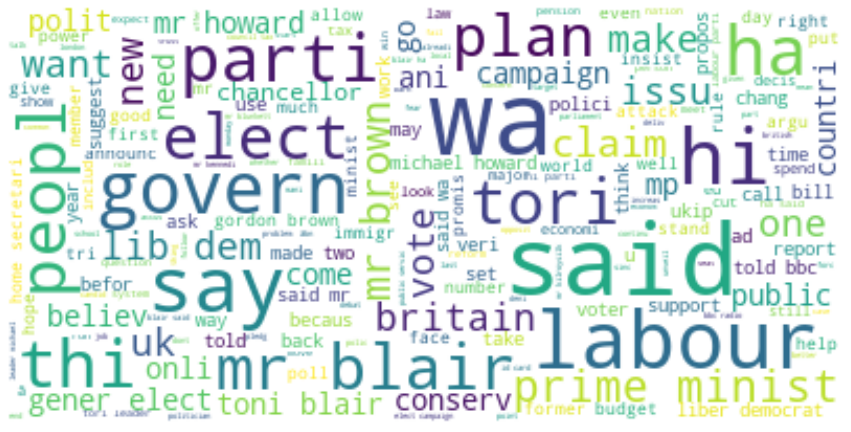

Group: 3


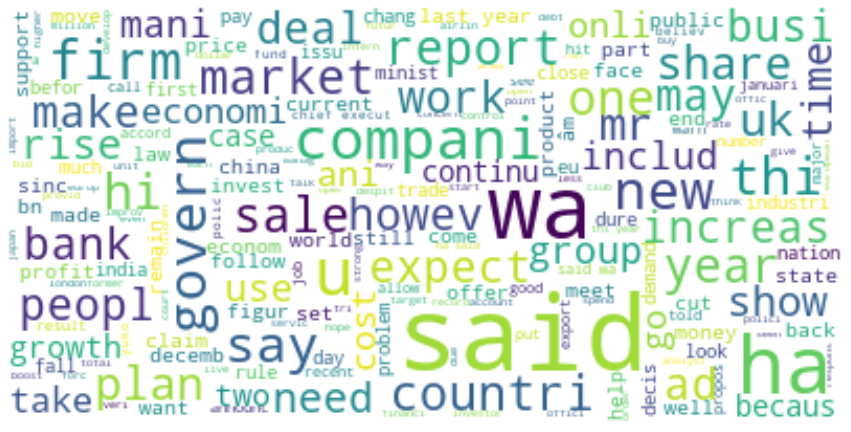

Group: 4


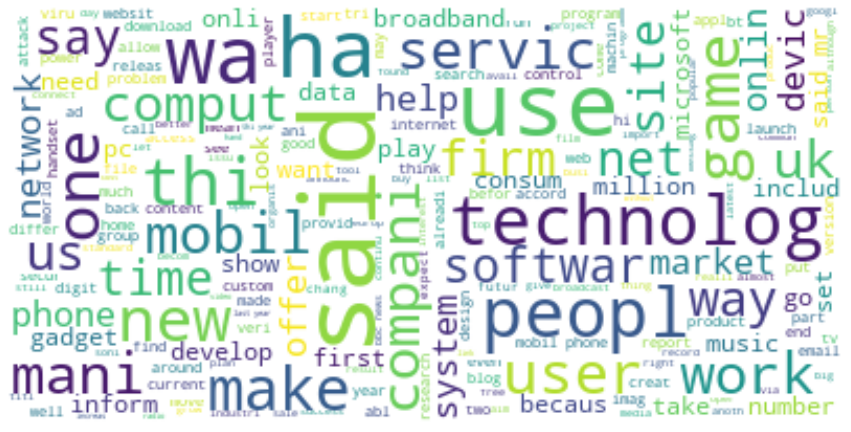

In [14]:
for label in label_group_content.index:
    print('Group: {}'.format(label))
    drawer.wordCloud(" ".join(label_group_content[label]), (15, 10))

> **Nhận xét**
> * Group 3: ta có các từ như *company*, *economy*, *sale*, *profit*, *analyst*, *bank*,... thì rất có thể đây là nhóm **business** ban đầu.
> * Group 2: ta có các từ như *govern*, *elect*, *country*, *campaign*, *britain*,... thì rất có thể đây là group **politics**.
> * Group 1: ta có các từ như *film*, *movie*, *actor*, *music*, *album*, *song* thì chắc chắn đây là group **entertainment**
> * Group 0: có các từ như *game*, *match*, *player*, *team*, *win*, *club*, *chelsea*, *goal*, *race*,... thì bảo đây là group **sport**
> * Group 4: các từ phổ biến là *technology*, *computer*, *network*, *software*, *company*, *phone*, *download*, *user*, *microsoft*, *developer* thì đây là group **technology**.

3.1.5. Áp dụng model để dự đoán

In [15]:
k5_kmeans_model.predict(['As Gonzaga made its way through this pandemic season, with its stops and starts and tenor of uncertainty, it eyed an opportunity to stamp the season with a different sort of historical marker — an unbeaten season', "If you’re wondering how you can make your employees happier at work, this is one of the best business articles to read. Schwartz and Porath dive deep into what motivates people—and what pushes them away.", "Joe Biden launched the early months of his presidency with a one-two combination that’s gone a long way toward taming the party’s restive left wing: Listen a lot, and back many of the policies that activists have long wanted.", "BLACKPINK is—we kind of felt like there's two colors that represented us the most ‘cause we're very girly but at the same time we're very savage too, Rosé explained for the group. We have a song called ‘Pretty Savage' and it kind of goes with ‘black pink' and so we thought it described us the best.", "In-depth stories show how pioneers are changing the world with inspiring discoveries and innovation. Preview potential industry transformation through emerging tech like AI & robotics, healthtech, fintech and smart city. Explore the innovation and tech opportunities taking shape at HKSTP and sparking change across Hong Kong, the Greater Bay Area and the world."])

# các bài viết lần lượt là sport, business, politics, entertaiment và technology 

content  class
0  As Gonzaga made its way through this pandemic ...      0
1  If you’re wondering how you can make your empl...      3
2  Joe Biden launched the early months of his pre...      3
3  BLACKPINK is—we kind of felt like there's two ...      3
4  In-depth stories show how pioneers are changin...      3

> **Nhận xét**
> * Khả năng dự đoán ko chính xác lắm, có thể dữ liệu của ta chưa đủ.

3.1.6. Dự đoán bằng chính dữ liệu train sau đó so sánh với giá trị thực

In [99]:
y_hat = k5_kmeans_model.predict(news['content'])

In [100]:
y_hat

content  class
0     collin call chamber return world champion kim ...      0
1     ronaldo consid new contract manchest unit wing...      0
2     tv call carrol error spur boss martin jol said...      0
3     england defens crisi grow england defens worri...      0
4     darci injuri add ireland woe gordon darci ha r...      0
...                                                 ...    ...
2220  disney settl disclosur charg walt disney ha se...      3
2221  fed chief warn us deficit feder reserv chairma...      3
2222  indonesia declin debt freez indonesia longer n...      3
2223  market signal brazilian recoveri brazilian sto...      3
2224  economi strong elect year uk busi set prosper ...      3

[2225 rows x 2 columns]

In [101]:
news["prediction"] = y_hat['class']

news

content     class  label  \
0     collin call chamber return world champion kim ...     sport      0   
1     ronaldo consid new contract manchest unit wing...     sport      0   
2     tv call carrol error spur boss martin jol said...     sport      0   
3     england defens crisi grow england defens worri...     sport      0   
4     darci injuri add ireland woe gordon darci ha r...     sport      0   
...                                                 ...       ...    ...   
2220  disney settl disclosur charg walt disney ha se...  business      3   
2221  fed chief warn us deficit feder reserv chairma...  business      3   
2222  indonesia declin debt freez indonesia longer n...  business      3   
2223  market signal brazilian recoveri brazilian sto...  business      3   
2224  economi strong elect year uk busi set prosper ...  business      3   

      prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
2220           3  
2221           3  
2222           3  
2223           3  
2224           3  

[2225 rows x 4 columns]

3.1.7. Trực quan hóa giữa kết quả thực, kết quả training và kết quả dự đoán dự trên training

> **Nhận xét**:
> * Model bị underfitting, cần phải khai thác thêm mẫu cho tập training data.

In [102]:
clusters = {
    "sport": 0,
    "entertainment": 1,
    "politics": 2,
    "business": 3,
    "tech": 4
}

In [103]:
news['class'].unique()

array(['sport', 'tech', 'politics', 'entertainment', 'business'],
      dtype=object)

In [104]:
x = news.groupby(['class']).agg(['count']).iloc[:, 0]
x

class
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: (content, count), dtype: int64

In [105]:
y = news.groupby(['label']).agg(['count']).iloc[:, 0]
y = [y[clusters[key]] for key in x.index.tolist()]

y

[777, 282, 270, 514, 382]

In [106]:
z = news.groupby(['prediction']).agg(['count']).iloc[:, 0]
z = [z[clusters[key]] for key in x.index.tolist()]

z

[777, 283, 269, 514, 382]

<AxesSubplot:>

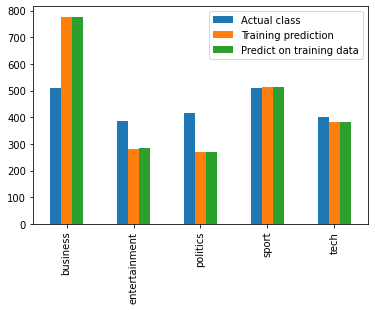

In [107]:
df = pd.DataFrame({
    'Actual class': x.values.tolist(),
    'Training prediction': y,
    'Predict on training data': z
}, index=x.index.tolist())

df.plot(kind='bar')

3.1.8. Kết luận
* Model phân lớp chưa quá tốt, class business trong quá trình train đựa ra nhiều hơn so với các class còn lại. Lí do có thể các vấn đề về business có liên quan chắc chẽ đến politics, điển hình là trong những năm gần đây chiến tranh thương mại Mỹ Trung, đối với hàn quốc, entertainment cũng dc coi là một ngành công nghiệp, tức ít nhiều liên quan đến business nên dễ gây hiểm nhầm cho model.